# 1. 서울시 구별 CCTV 현황 분석
    - http://opengov.seoul.go.kr
    - http://stat.seoul.go.kr

In [1]:
import numpy as np
import pandas as pd
# 전체적인 환경설정 용도
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname = 'C:\Windows\Fonts\malgun.ttf').get_name()
plt.rc('font', family = font_name)

mpl.rcParams['axes.unicode_minus'] = False

### 1) 데이터 수집

In [2]:
# cctv 자료 불러오기

cctv = pd.read_csv('C:\\Users\\acorn\\python\\analysis\\data\\seoul\\cctv.csv')

cctv.head(5)

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [3]:
# 인구수 자료 불러오기(필요한 자료만)
people = pd.read_excel('C:\\Users\\acorn\\python\\analysis\\data\\seoul\\Report.xls', 
                       usecols = 'B,D,G,J,N',
                       header = 2)
people.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10112070,9838892,273178,1382420
1,종로구,164348,154549,9799,26429
2,중구,135139,126082,9057,21655
3,용산구,245411,229909,15502,37238
4,성동구,314551,306532,8019,41752


### 2) 데이터 전처리

In [7]:
# 컬럼명 변경

# cctv 자료에서 기관명 -> 구별
cctv.rename(columns = {cctv.columns[0]:'구별'}, inplace = True)

#인구수 데이터에서 컬럼명을 구별, 인구수, 한국인, 외국인, 고령자로 변경
people.rename(columns = {people.columns[0]:'구별',
                         people.columns[1]:'인구수',
                         people.columns[2]:'한국인',
                         people.columns[3]:'외국인',
                         people.columns[4]:'고령자'}, inplace= True)
people.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10112070,9838892,273178,1382420
1,종로구,164348,154549,9799,26429
2,중구,135139,126082,9057,21655
3,용산구,245411,229909,15502,37238
4,성동구,314551,306532,8019,41752


### 3) 탐색적 데이터 분석
    -데이터 간의 관계를 파악하기 위해 데이터의 기초통계 및 데이터의 분포를 파악하여 변수간의 유의미한 관계를 확인함.

In [13]:
# 어느구가 가장 cctv가 많이 설치되어있는가(가장 적게 설치되어있는가?)

#cctv 데이터에서 소계를 기준으로 정렬

print(cctv.sort_values(by='소계', ascending = False).head(5)) # 많은 순
print('+'*50)
print(cctv.sort_values(by='소계').head(5) )# 적은 순


     구별    소계  2013년도 이전  2014년  2015년  2016년
0   강남구  3238       1292    430    584    932
18  양천구  2482       1843    142     30    467
14  서초구  2297       1406    157    336    398
4   관악구  2109        846    260    390    613
21  은평구  2108       1138    224    278    468
++++++++++++++++++++++++++++++++++++++++++++++++++
     구별   소계  2013년도 이전  2014년  2015년  2016년
9   도봉구  825        238    159     42    386
2   강북구  831        369    120    138    204
5   광진구  878        573     78     53    174
3   강서구  911        388    258    184     81
24  중랑구  916        509    121    177    109


In [22]:
# cctv 설치 증가율!
# cctv 설치 연도별 증가율을 구해서 최근 증가율 컬럼 추가
# (2014 + 2015 + 2016)/2013년도 이전 *100

cctv['최근 증가율'] = round((cctv.loc[:,'2014년']+cctv.loc[:,'2015년']+cctv.loc[:,'2016년'])/cctv.loc[:,'2013년도 이전']*100, 2)

print(cctv.sort_values(by='최근 증가율', ascending = False).head())
print('+'*60)
print(cctv.sort_values(by='최근 증가율').head())

     구별    소계  2013년도 이전  2014년  2015년  2016년  최근 증가율
22  종로구  1619        464    314    211    630  248.92
9   도봉구   825        238    159     42    386  246.64
12  마포구   980        314    118    169    379  212.10
8   노원구  1566        542     57    451    516  188.93
1   강동구  1010        379     99    155    377  166.49
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
      구별    소계  2013년도 이전  2014년  2015년  2016년  최근 증가율
18   양천구  2482       1843    142     30    467   34.67
13  서대문구  1254        844     50     68    292   48.58
20   용산구  2096       1368    218    112    398   53.22
5    광진구   878        573     78     53    174   53.23
14   서초구  2297       1406    157    336    398   63.37


In [30]:
# 인구 수 데이터 분석

# 필요없는 행 삭제 : del(열), drop(행)

people.drop([0], inplace = True)

people.head()



,구별,인구수,한국인,외국인,고령자
1,종로구,164348,154549,9799,26429
2,중구,135139,126082,9057,21655
3,용산구,245411,229909,15502,37238
4,성동구,314551,306532,8019,41752
5,광진구,371671,357149,14522,44470


In [32]:
# 구별데이터의 중복이나 결측치등을 확인
people['구별'].unique()
people[people['구별'].isnull()]


,구별,인구수,한국인,외국인,고령자
26,NaN,0,0,0,0


In [34]:
# 결측치 삭제하기
people.drop([26], inplace = True)

In [47]:
# 어느 구가 인구수가 가장 많은가? 적은가?

print('인구수')
print(people.sort_values(by = '인구수', ascending = False).head())
print('+'*60)
print(people.sort_values(by = '인구수').head())
print('+'*60)
print('외국인!')
print(people.sort_values(by = '외국인', ascending = False).head())
print('+'*60)
print(people.sort_values(by = '외국인').head())
print('+'*60)
print('고령자!')
print(people.sort_values(by = '고령자', ascending = False).head())
print('+'*60)
print(people.sort_values(by = '고령자').head())


인구수
     구별     인구수     한국인    외국인    고령자
24  송파구  671994  665282   6712  77978
16  강서구  608361  601696   6665  77381
23  강남구  557865  552976   4889  65859
11  노원구  555803  551902   3901  75081
21  관악구  522292  504445  17847  70807
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
     구별     인구수     한국인    외국인    고령자
2    중구  135139  126082   9057  21655
1   종로구  164348  154549   9799  26429
3   용산구  245411  229909  15502  37238
18  금천구  253344  234238  19106  34640
4   성동구  314551  306532   8019  41752
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
외국인!
      구별     인구수     한국인    외국인    고령자
19  영등포구  403988  369128  34860  54704
17   구로구  440396  408369  32027  59838
18   금천구  253344  234238  19106  34640
21   관악구  522292  504445  17847  70807
6   동대문구  364962  349308  15654  56284
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
     구별     인구수     한국인   외국인    고령자
10  도봉구  345041  342861  2180  54293
9   강북구  327511  323862  3649  57002
15  양천구

In [51]:
# 외국인 비율, 고령자 비율 컬럼 추가 후 순위 확인
people['외국인비율'] = round(people.loc[:,'외국인']/people.loc[:,'인구수']*100, 2)
people['고령자비율'] = round(people.loc[:,'고령자']/people.loc[:,'인구수']*100, 2)

people.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,164348,154549,9799,26429,5.96,16.08
2,중구,135139,126082,9057,21655,6.70,16.02
3,용산구,245411,229909,15502,37238,6.32,15.17
4,성동구,314551,306532,8019,41752,2.55,13.27
5,광진구,371671,357149,14522,44470,3.91,11.96


In [52]:
# 전체 인구 대비 외국인, 고령자 수의 순위
print('외국인!')
print(people.sort_values(by = '외국인비율', ascending = False).head())
print('+'*60)
print(people.sort_values(by = '외국인비율').head())
print('+'*60)
print('고령자!')
print(people.sort_values(by = '고령자비율', ascending = False).head())
print('+'*60)
print(people.sort_values(by = '고령자비율').head())


외국인!
      구별     인구수     한국인    외국인    고령자  외국인비율  고령자비율
19  영등포구  403988  369128  34860  54704   8.63  13.54
18   금천구  253344  234238  19106  34640   7.54  13.67
17   구로구  440396  408369  32027  59838   7.27  13.59
2     중구  135139  126082   9057  21655   6.70  16.02
3    용산구  245411  229909  15502  37238   6.32  15.17
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
     구별     인구수     한국인   외국인    고령자  외국인비율  고령자비율
10  도봉구  345041  342861  2180  54293   0.63  15.74
11  노원구  555803  551902  3901  75081   0.70  13.51
15  양천구  473087  469221  3866  56070   0.82  11.85
23  강남구  557865  552976  4889  65859   0.88  11.81
12  은평구  490253  485902  4351  75535   0.89  15.41
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
고령자!
      구별     인구수     한국인    외국인    고령자  외국인비율  고령자비율
9    강북구  327511  323862   3649  57002   1.11  17.40
1    종로구  164348  154549   9799  26429   5.96  16.08
2     중구  135139  126082   9057  21655   6.70  16.02
10   도봉구  345041  342861   2180 

In [54]:
#CCTV 데이터와 인구대비 데이터를 병합, 분석
data_result = pd.merge(cctv, people, on = '구별')
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,1292,430,584,932,150.62,557865,552976,4889,65859,0.88,11.81
1,강동구,1010,379,99,155,377,166.49,438225,434027,4198,56983,0.96,13.00
2,강북구,831,369,120,138,204,125.20,327511,323862,3649,57002,1.11,17.40
3,강서구,911,388,258,184,81,134.79,608361,601696,6665,77381,1.10,12.72
4,관악구,2109,846,260,390,613,149.29,522292,504445,17847,70807,3.42,13.56


In [55]:
# 데이터 정리(필요없는 컬럼 삭제) : 2013년도 이전, 2014년, 2015년, 2016년
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']

In [56]:
data_result.head()

,구별,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,150.62,557865,552976,4889,65859,0.88,11.81
1,강동구,1010,166.49,438225,434027,4198,56983,0.96,13.00
2,강북구,831,125.20,327511,323862,3649,57002,1.11,17.40
3,강서구,911,134.79,608361,601696,6665,77381,1.10,12.72
4,관악구,2109,149.29,522292,504445,17847,70807,3.42,13.56


In [61]:
# 구별 컬럼을 인덱스로!
data_result.set_index('구별', inplace = True)

data_result.head()

,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,3238,150.62,557865,552976,4889,65859,0.88,11.81
강동구,1010,166.49,438225,434027,4198,56983,0.96,13.00
강북구,831,125.20,327511,323862,3649,57002,1.11,17.40
강서구,911,134.79,608361,601696,6665,77381,1.10,12.72
관악구,2109,149.29,522292,504445,17847,70807,3.42,13.56


In [64]:
# CCTV의 소계가 인구데이터 중 어느 변수와 관계가 있는지 확인(상관관계)
# 상관계수 : -1 ~ 1
#0.3 이하 : 약한 상관관계
# 0.7 이하 : 뚜렷한 상관관계

np.corrcoef(data_result['고령자비율'], data_result['소계'])
np.corrcoef(data_result['외국인비율'], data_result['소계'])
np.corrcoef(data_result['인구수'], data_result['소계'])

array([[1.        , 0.23037183],
       [0.23037183, 1.        ]])

In [68]:
print(data_result.sort_values(by = '소계', ascending = False).head())
print('+'*60)
print(data_result.sort_values(by = '인구수', ascending = False).head())
print('+'*60)
print(data_result.sort_values(by = '인구수').head())

       소계  최근 증가율     인구수     한국인    외국인    고령자  외국인비율  고령자비율
구별                                                           
강남구  3238  150.62  557865  552976   4889  65859   0.88  11.81
양천구  2482   34.67  473087  469221   3866  56070   0.82  11.85
서초구  2297   63.37  445164  440954   4210  54055   0.95  12.14
관악구  2109  149.29  522292  504445  17847  70807   3.42  13.56
은평구  2108   85.24  490253  485902   4351  75535   0.89  15.41
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
       소계  최근 증가율     인구수     한국인    외국인    고령자  외국인비율  고령자비율
구별                                                           
송파구  1081  104.35  671994  665282   6712  77978   1.00  11.60
강서구   911  134.79  608361  601696   6665  77381   1.10  12.72
강남구  3238  150.62  557865  552976   4889  65859   0.88  11.81
노원구  1566  188.93  555803  551902   3901  75081   0.70  13.51
관악구  2109  149.29  522292  504445  17847  70807   3.42  13.56
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
       소계 

In [70]:
# cctv 비율 컬럼 추가!!

data_result['CCTV비율'] = round((data_result['소계']/data_result['인구수'])*100, 2)
data_result.head()

,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,150.62,557865,552976,4889,65859,0.88,11.81,0.58
강동구,1010,166.49,438225,434027,4198,56983,0.96,13.00,0.23
강북구,831,125.20,327511,323862,3649,57002,1.11,17.40,0.25
강서구,911,134.79,608361,601696,6665,77381,1.10,12.72,0.15
관악구,2109,149.29,522292,504445,17847,70807,3.42,13.56,0.40


In [72]:
print(data_result.sort_values(by = '소계', ascending = False).head())
print('+'*80)
print(data_result.sort_values(by = 'CCTV비율', ascending = False).head())
print('+'*80)
print(data_result.sort_values(by = 'CCTV비율').head())

       소계  최근 증가율     인구수     한국인    외국인    고령자  외국인비율  고령자비율  CCTV비율
구별                                                                   
강남구  3238  150.62  557865  552976   4889  65859   0.88  11.81    0.58
양천구  2482   34.67  473087  469221   3866  56070   0.82  11.85    0.52
서초구  2297   63.37  445164  440954   4210  54055   0.95  12.14    0.52
관악구  2109  149.29  522292  504445  17847  70807   3.42  13.56    0.40
은평구  2108   85.24  490253  485902   4351  75535   0.89  15.41    0.43
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
       소계  최근 증가율     인구수     한국인    외국인    고령자  외국인비율  고령자비율  CCTV비율
구별                                                                   
종로구  1619  248.92  164348  154549   9799  26429   5.96  16.08    0.99
용산구  2096   53.22  245411  229909  15502  37238   6.32  15.17    0.85
중구   1023  147.70  135139  126082   9057  21655   6.70  16.02    0.76
강남구  3238  150.62  557865  552976   4889  65859   0.88  11.81    0.58
금천구  1348

### 4) 시각화

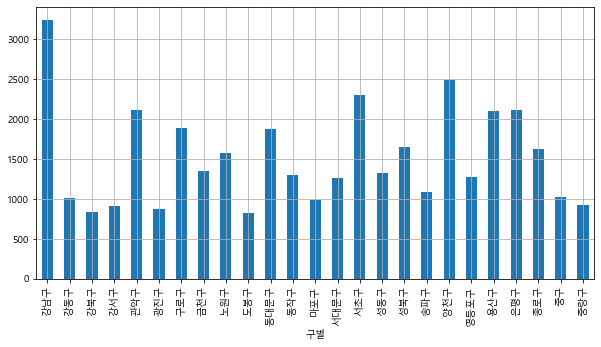

In [74]:
# CCTV가 많이 설치된 구별로 그래프 그리기
data_result['소계'].plot(kind = 'bar', figsize = (10,5), grid=True)

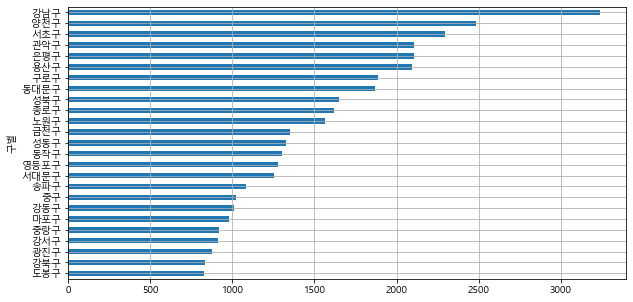

In [78]:
# 보기 편하게 정렬후 출력!
data_result['소계'].sort_values().plot(kind = 'barh', figsize = (10,5), grid=True)

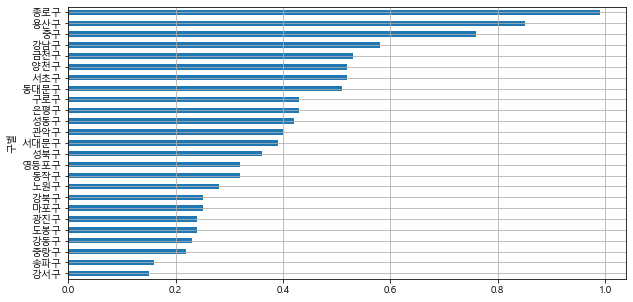

In [79]:
# CCTV 비율을 그래프로

data_result['CCTV비율'].sort_values().plot(kind = 'barh', figsize = (10,5), grid=True)

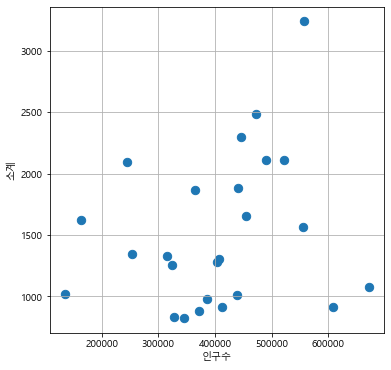

In [84]:
# CCTV 설치 대수와 인구수의 상관관계를 그래프로 확인
plt.figure(figsize = (6,6))
plt.scatter(data_result['인구수'], data_result['소계'],s = 70)
plt.xlabel('인구수')
plt.ylabel('소계')
plt.grid() # 눈금선

In [92]:
# poly1d() : 방정식을 만들어주는 함수
print(np.poly1d([1,2]))
print(np.poly1d([1,2,3]))

# polyfit() : 회귀선 작성
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)
print(fp1)

f1 = np.poly1d(fp1)
print(f1)


 
1 x + 2
   2
1 x + 2 x + 3
[1.10432363e-03 1.06864009e+03]
 
0.001104 x + 1069


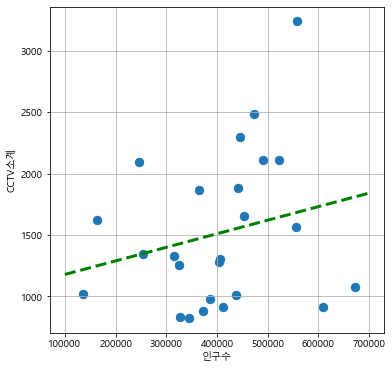

In [98]:
fx = np.linspace(100000,700000, 100)

plt.figure(figsize = (6,6))
plt.scatter(data_result['인구수'], data_result['소계'],s = 70)
#plt.plot(data_result['인구수'], f1(data_result['인구수']), lw = 3, color='g', ls = 'dashed') # 회귀선
plt.plot(fx, f1(fx), lw = 3, color='g', ls = 'dashed')
plt.xlabel('인구수')
plt.ylabel('CCTV소계')
plt.grid() # 눈금선

In [101]:
# 각 데이터의 오차를 구해서 '오차' 라는 파생변수 추가
data_result['오차'] = np.abs(data_result['소계']- f1(data_result['인구수']))

,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,3238,150.62,557865,552976,4889,65859,0.88,11.81,0.58,1553.296412
강동구,1010,166.49,438225,434027,4198,56983,0.96,13.00,0.23,542.582309
강북구,831,125.20,327511,323862,3649,57002,1.11,17.40,0.25,599.318223
강서구,911,134.79,608361,601696,6665,77381,1.10,12.72,0.15,829.467513
관악구,2109,149.29,522292,504445,17847,70807,3.42,13.56,0.40,463.580517


In [109]:
df_sort = data_result.sort_values(by = '오차', ascending= False)

df_sort.tail()
df_sort.index

Index(['강남구', '양천구', '강서구', '용산구', '서초구', '송파구', '도봉구', '중랑구', '광진구', '강북구',
       '강동구', '마포구', '은평구', '관악구', '동대문구', '종로구', '구로구', '영등포구', '동작구', '중구',
       '서대문구', '노원구', '성동구', '성북구', '금천구'],
      dtype='object', name='구별')

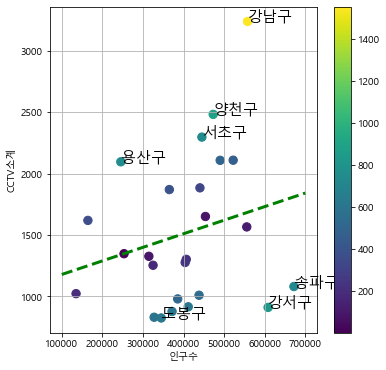

In [116]:

plt.figure(figsize = (6,6))
plt.scatter(data_result['인구수'], data_result['소계'],s = 70, c = data_result['오차'])
plt.plot(fx, f1(fx), lw = 3, color='g', ls = 'dashed')
plt.xlabel('인구수')
plt.ylabel('CCTV소계')
plt.grid() # 눈금선
plt.colorbar()


#plt.text(df_sort['인구수'][0],df_sort['소계'][0],'강남구')

# 반복문을 통해 상위 7개의 데이터에 이름 표기
for n in range(7):
    plt.text(df_sort['인구수'][n],df_sort['소계'][n],df_sort.index[n], fontsize = 15)


In [117]:
# 최종 결과물 파일로 저장

df_sort.to_csv('C:\\Users\\acorn\\python\\analysis\\data\\seoul\\cctv_result_utf.csv', encoding = 'utf-8')
df_sort.to_csv('C:\\Users\\acorn\\python\\analysis\\data\\seoul\\cctv_result_euc.csv', encoding = 'euc-kr')